<a href="https://colab.research.google.com/github/ramirezzzluisss/IS4487/blob/main/Week10Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5 Script

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')

Mounted at /content/gdrive


In [4]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [5]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [6]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [9]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['num_accts'] > 0) & (df['num_accts'] < 10)]

#remove rows with negative income values
df_clean = df_clean[(df_clean['income'] > 0)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna() 

#remove the product variable
df_clean = df_clean.drop(['product'], axis=1)

df_clean.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
count,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000
mean,0.556800,33274.276805,0.055622,34.492839,1.918815,1.143878,0.215816,0.682077,0.236666,1.477755,0.967149,2.508104,0.085826
std,0.496772,28741.242453,0.229195,11.095177,0.586342,0.350972,0.411395,0.465678,0.425043,1.238905,1.490369,1.063864,0.280112
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,13640.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,23230.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,40200.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27579 entries, 1 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        27579 non-null  int64  
 1   income          27579 non-null  int64  
 2   female          27579 non-null  int64  
 3   age             27579 non-null  int64  
 4   job             27579 non-null  int64  
 5   num_dependents  27579 non-null  int64  
 6   rent            27579 non-null  int64  
 7   own_res         27579 non-null  int64  
 8   new_car         27579 non-null  float64
 9   chk_acct        27579 non-null  int64  
 10  sav_acct        27579 non-null  int64  
 11  num_accts       27579 non-null  int64  
 12  mobile          27579 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.9 MB


# Convert categories to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [11]:
#new_clear from float to int

df_clean['new_car'] = df_clean['new_car'].astype('int')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27579 entries, 1 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   answered        27579 non-null  int64
 1   income          27579 non-null  int64
 2   female          27579 non-null  int64
 3   age             27579 non-null  int64
 4   job             27579 non-null  int64
 5   num_dependents  27579 non-null  int64
 6   rent            27579 non-null  int64
 7   own_res         27579 non-null  int64
 8   new_car         27579 non-null  int64
 9   chk_acct        27579 non-null  int64
 10  sav_acct        27579 non-null  int64
 11  num_accts       27579 non-null  int64
 12  mobile          27579 non-null  int64
dtypes: int64(13)
memory usage: 2.9 MB


## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [12]:
#Find the mean value
df_clean['answered'].mean()

#Answer to question 2

0.5568004641212517

## Fit a basic tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree." 

What is the accuracy of the money tree? 

In [16]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income']]
y = df_clean['answered']

income_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
income_tree = income_tree.fit(x,y)


## Preview the tree


In [17]:
income_tree_text = tree.export_text(income_tree)
print(income_tree_text)

|--- feature_0 <= 63270.00
|   |--- feature_0 <= 39135.00
|   |   |--- feature_0 <= 35625.00
|   |   |   |--- feature_0 <= 4295.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  4295.00
|   |   |   |   |--- feature_0 <= 9595.00
|   |   |   |   |   |--- feature_0 <= 7890.00
|   |   |   |   |   |   |--- feature_0 <= 6990.00
|   |   |   |   |   |   |   |--- feature_0 <= 6255.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 4455.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  4455.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 5900.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  5900.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 6135.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  6135.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |

## Check Accuracy

What is the accuracy of the answered_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [18]:
pred = income_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.99535878748323


## Prune the tree

Limit the number of levels to 2

In [25]:
income_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# Create Decision Tree Classifer
income_tree2 = income_tree2.fit(x,y)


## Preview the new tree

In [26]:
income_tree2_text = tree.export_text(income_tree2)
print(income_tree2_text)

|--- feature_0 <= 111910.00
|   |--- class: 1
|--- feature_0 >  111910.00
|   |--- class: 0



## Re-Check Accuracy

Is this accuracy better than making a random guess?  (check the distribution above)

In [27]:
pred = income_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.5869683454802567


## Visualize the model

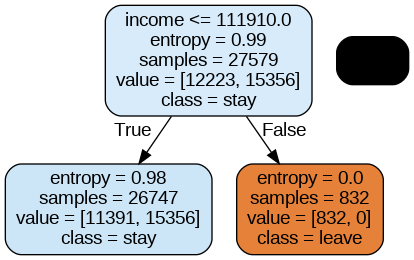

In [31]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(income_tree2, out_file=dot_data, 
                   feature_names=x.columns,class_names=['leave','stay'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [37]:
# question 4

# entropy(parent): entropy in the parent, prior to the split. Hint:  This is node 1).
parent_entropy = 0.99

# entropy(c1): entropy in the first child.
first_entropy = 0.98
# p(c1): the proportion of observations from the parent that wind up in the first child after the split.
first_proportion = 26747 / 27579

# entropy(c2): entropy in the second child.
second_entropy = 0.0
# p(c2): the proportion of observations from the parent that wind up in the second child after the split.
second_proportion = 832 / 27579

# IG = entropy(parent) - [p(c1) * entropy(c1) + p(c2) * entropy(c2)]

IG = parent_entropy - (first_proportion * first_entropy + second_proportion * second_entropy)

print(IG)

0.03956452373182495


## Fit a full tree model

Use all of the independent attributes.  We'll call this the "full tree." 

What is the accuracy of the full tree? 

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27579 entries, 1 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   answered        27579 non-null  int64
 1   income          27579 non-null  int64
 2   female          27579 non-null  int64
 3   age             27579 non-null  int64
 4   job             27579 non-null  int64
 5   num_dependents  27579 non-null  int64
 6   rent            27579 non-null  int64
 7   own_res         27579 non-null  int64
 8   new_car         27579 non-null  int64
 9   chk_acct        27579 non-null  int64
 10  sav_acct        27579 non-null  int64
 11  num_accts       27579 non-null  int64
 12  mobile          27579 non-null  int64
dtypes: int64(13)
memory usage: 2.9 MB


In [33]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','female','age','job','num_dependents','rent','own_res','new_car','chk_acct','sav_acct','num_accts','mobile']]
y = df_clean['answered']

full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=12)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x,y)


##Visualize the full tree

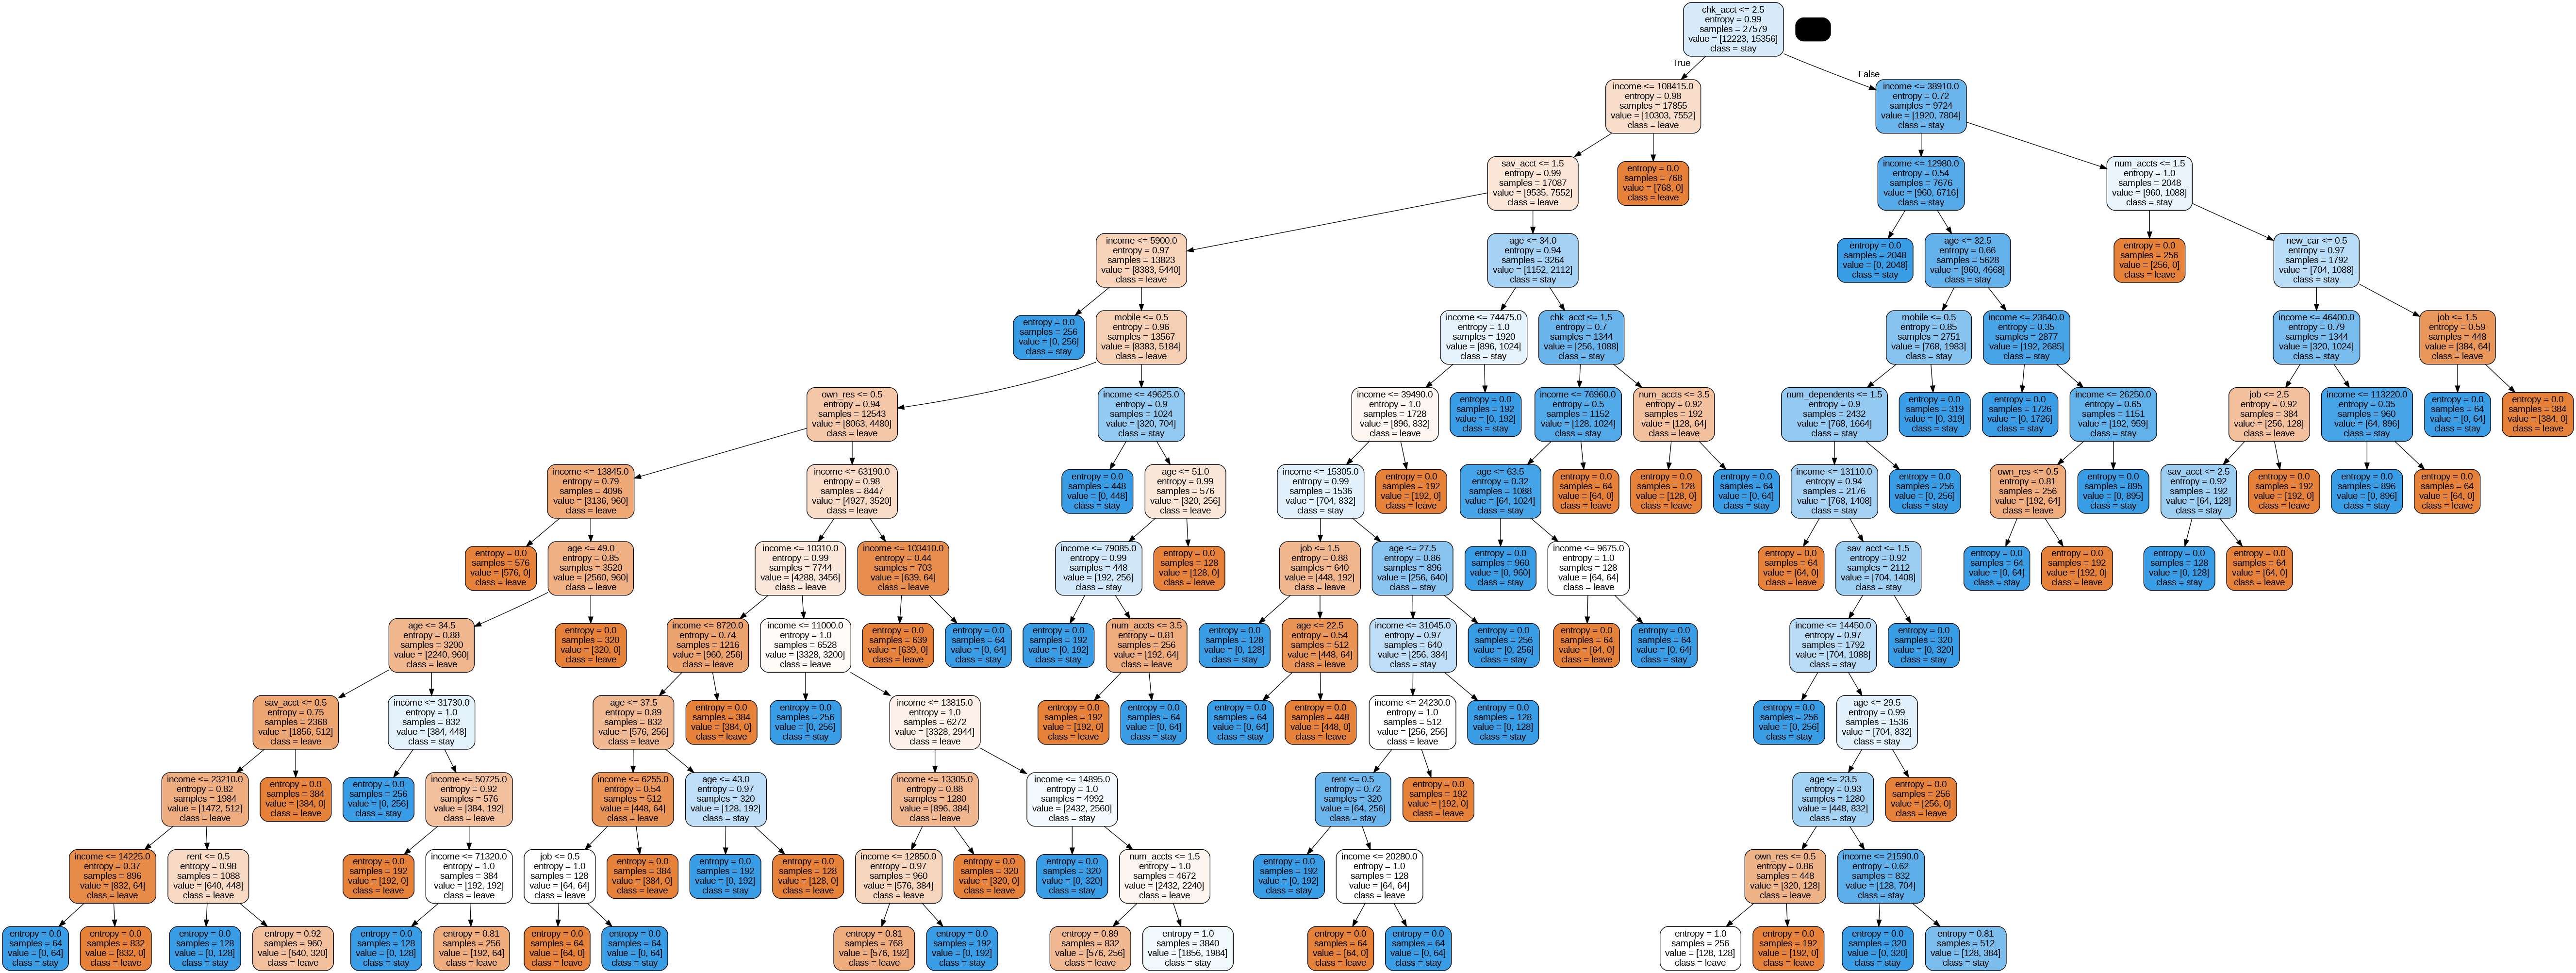

In [34]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(full_tree, out_file=dot_data, 
                   feature_names=x.columns,class_names=['leave','stay'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Check Accuracy

In [35]:
pred = full_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.8932521121142899
